In [34]:
# Data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
# Data Import
ds=pd.read_csv('dataset_heart.csv')

In [36]:
ds

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [37]:
ds['heart disease'] = ds['heart disease'].replace(1, 0)
ds['heart disease'] = ds['heart disease'].replace(2, 1)
#1 - disease presence, 0- disease absence

In [38]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [39]:
ds.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [40]:
ds.isnull().values.any()

False

In [41]:
column_names = ds.columns.tolist()

for col in column_names:
  print(col,'\n',ds[col].value_counts()) # Check the data

age 
 54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: age, dtype: int64
sex  
 1    183
0     87
Name: sex , dtype: int64
chest pain type 
 4    129
3     79
2     42
1     20
Name: chest pain type, dtype: int64
resting blood pressure 
 120    34
130    31
140    30
110    17
150    17
160    11
125    10
138     9
112     9
128     9
118     7
132     6
135     6
108     6
124     5
145     5
134     4
100     4
152     4
180     3
136     3
115     3
105     3
126     3
122     3
142     3
94      2
102     2
178     2
170     2
104     1
200     1
155     1
101     1
129     1
123     1
192     1
117     1
158     1
146     1
156     1
165     1
174     1
144   

In [42]:
# Data division: categorical and numerical data
cat_features=['age','sex ','chest pain type','fasting blood sugar','resting electrocardiographic results','exercise induced angina', 'ST segment','major vessels','thal','heart disease']
num_features=['resting blood pressure','serum cholestoral','oldpeak','max heart rate']

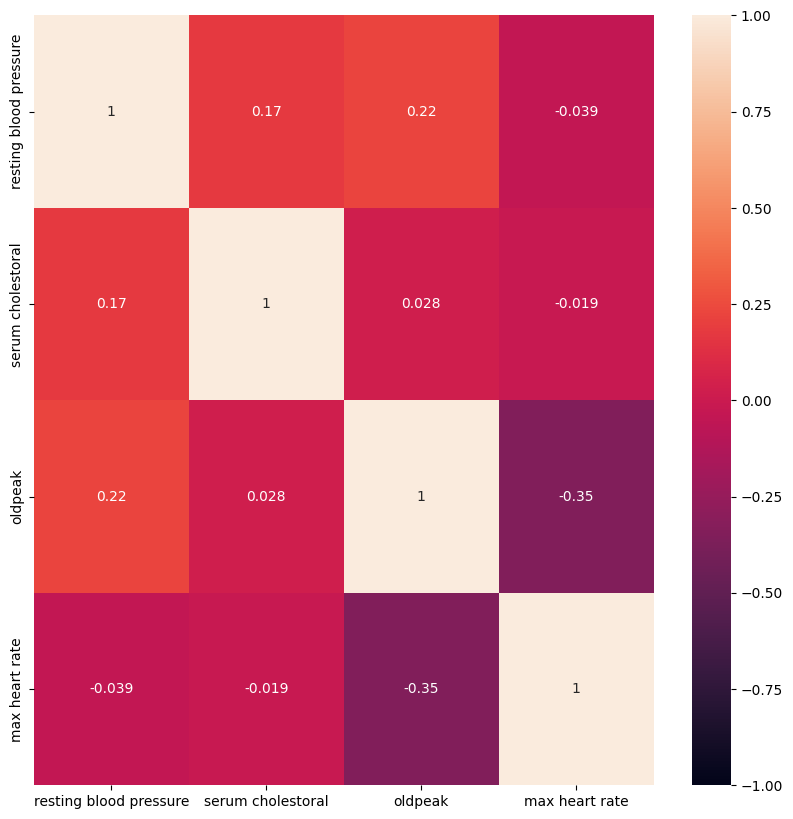

In [43]:
# Correlation matrix for numerical features
plt.figure(figsize=(10,10))
sns.heatmap(ds[num_features].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [44]:
# Correlation between numerical and categorical data

corr_matrix=[]

for col1 in num_features:
  for col2 in cat_features:
    correlation = stats.pointbiserialr(ds[col1], ds[col2])[0]
    corr_matrix.append((col1,col2,correlation))
cm_ds=pd.DataFrame(corr_matrix)

cm_ds_sorted = cm_ds.sort_values(by=cm_ds.columns[-1])

cm_ds_sorted

,0,1,2
39,max heart rate,heart disease,-0.418514
30,max heart rate,age,-0.402215
36,max heart rate,ST segment,-0.386847
35,max heart rate,exercise induced angina,-0.380719
32,max heart rate,chest pain type,-0.317682
37,max heart rate,major vessels,-0.265333
38,max heart rate,thal,-0.253397
11,serum cholestoral,sex,-0.201647
31,max heart rate,sex,-0.076101
34,max heart rate,resting electrocardiographic results,-0.074628


In [45]:
# Correlation between categorical features

def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_result = stats.chi2_contingency(crosstab)
    chi2 = chi2_result[0]
    n = crosstab.sum().sum()
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

corr_matrix=[]

for col1 in cat_features:
  for col2 in cat_features:
    if col1 != col2:
      correlation = cramers_v(ds[col1], ds[col2])
      corr_matrix.append((col1,col2,correlation))
cm_ds=pd.DataFrame(corr_matrix)

cm_ds_sorted = cm_ds.sort_values(by=cm_ds.columns[-1])

cm_ds_sorted

,0,1,2
0,age,sex,0.000000
48,exercise induced angina,fasting blood sugar,0.000000
55,ST segment,sex,0.000000
43,resting electrocardiographic results,thal,0.000000
42,resting electrocardiographic results,major vessels,0.000000
...,...,...,...
3,age,resting electrocardiographic results,0.472443
26,chest pain type,heart disease,0.493745
83,heart disease,chest pain type,0.493745
80,thal,heart disease,0.519375


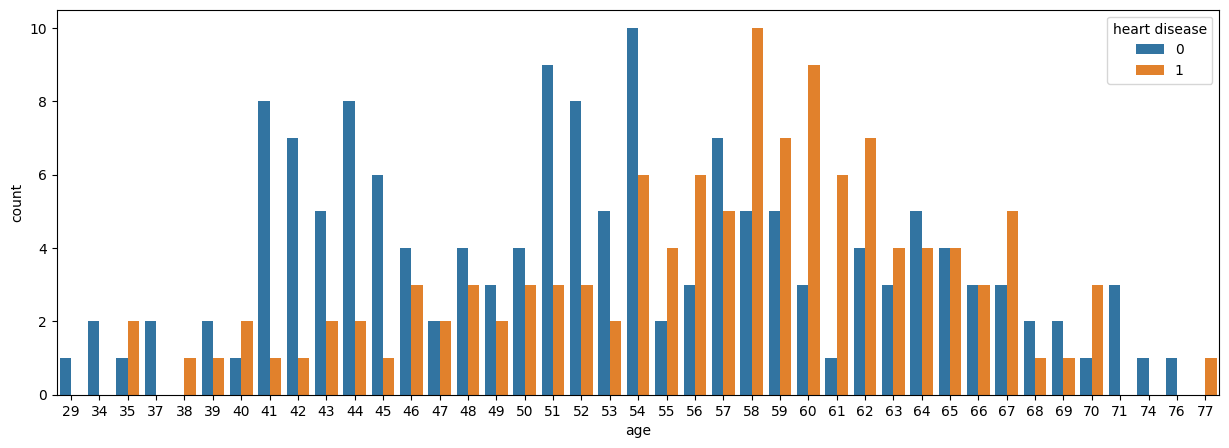

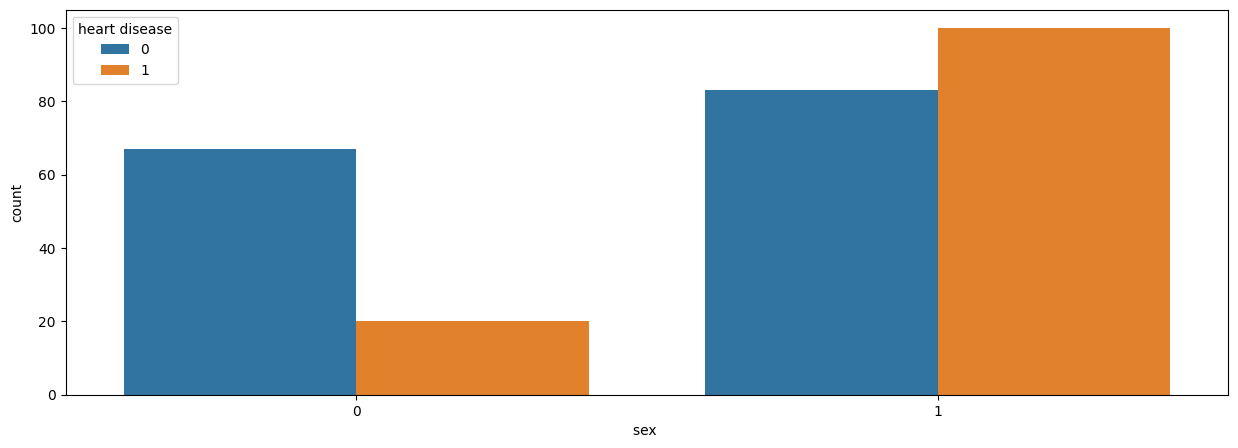

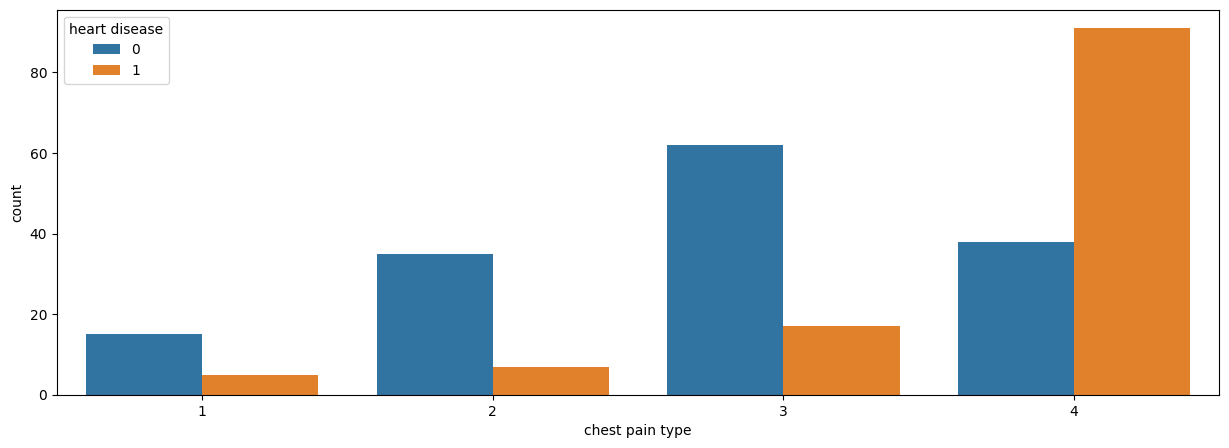

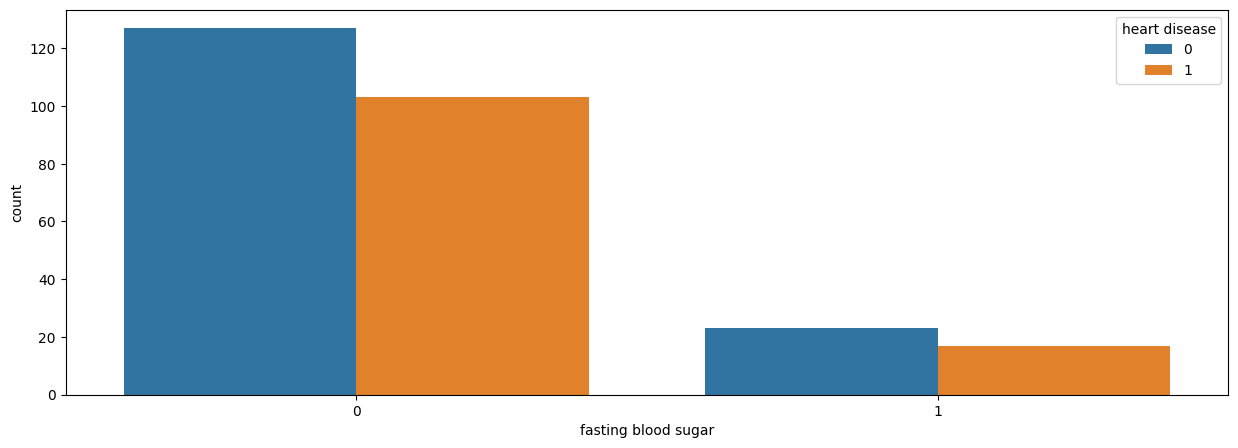

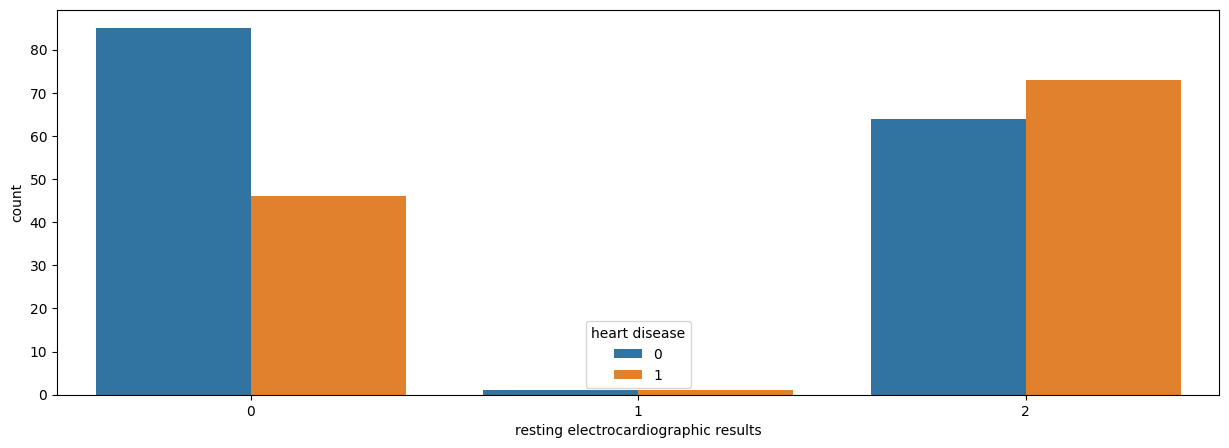

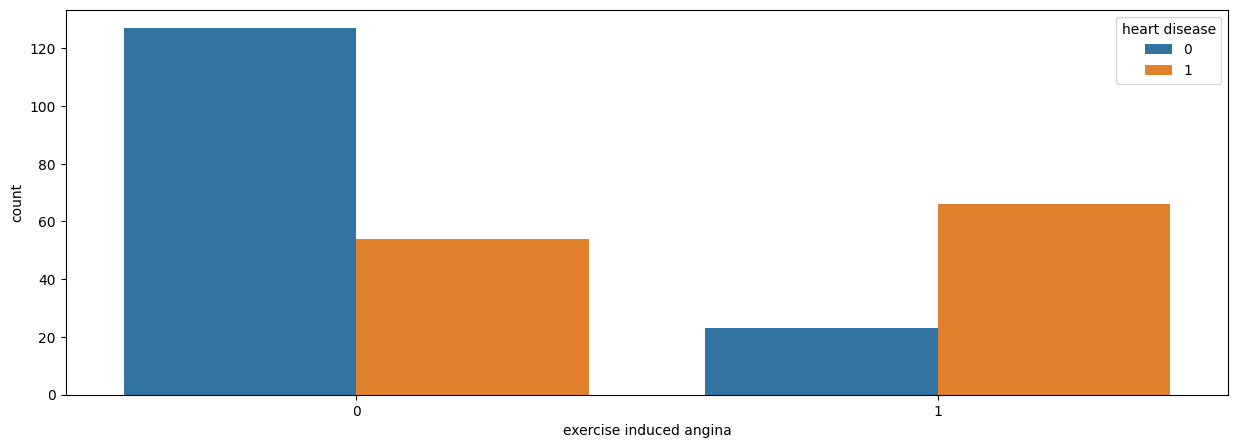

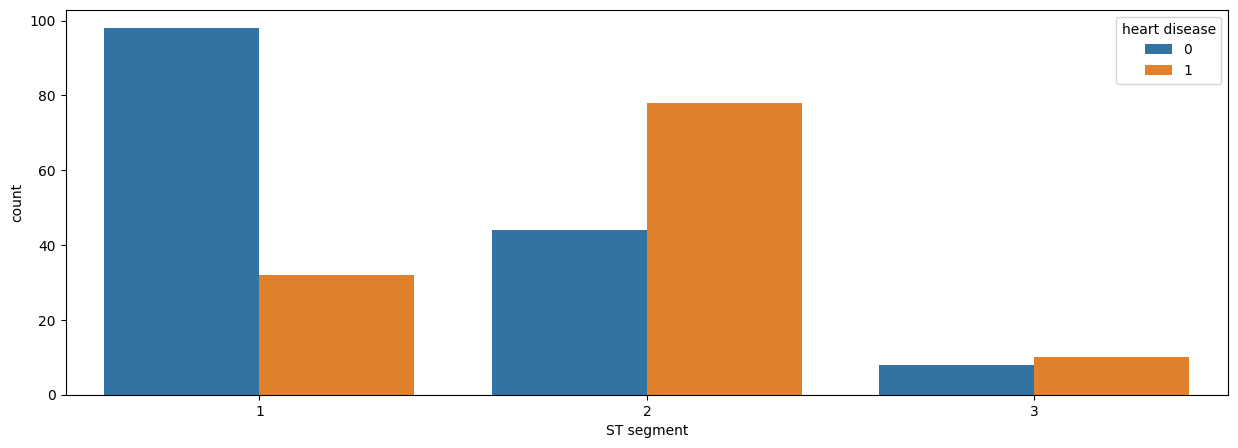

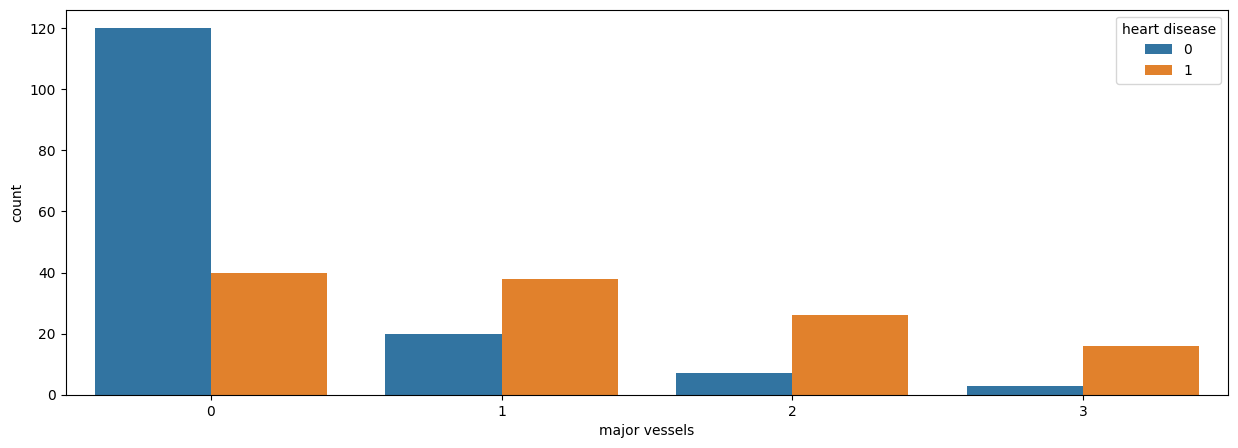

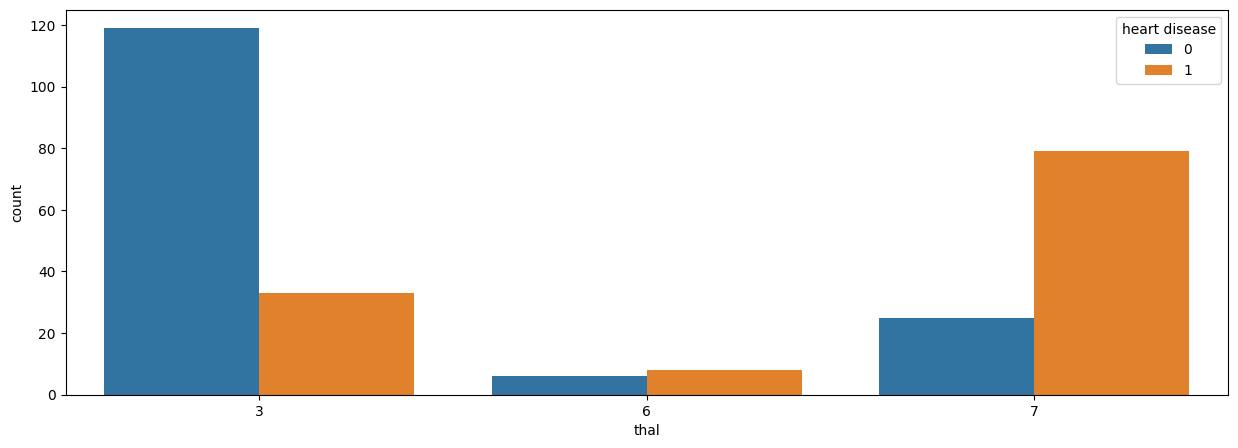

In [46]:
# Dataset visualisation: categorical features distribution
for feature in cat_features:
  if feature != 'heart disease':
    plt.figure(figsize=(15,5))
    sns.countplot(x=feature, hue='heart disease', data=ds)

<Figure size 1500x500 with 0 Axes>

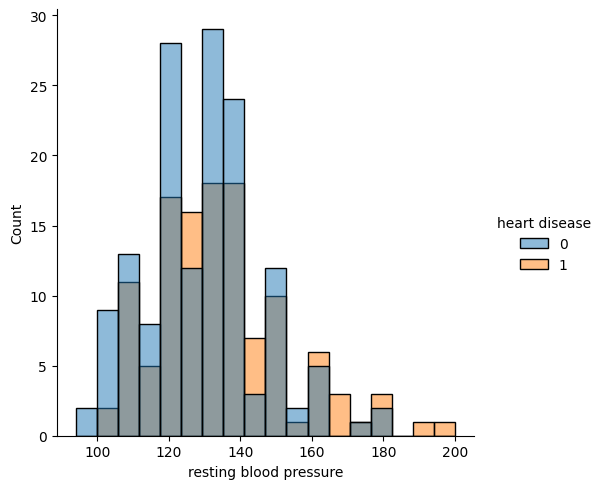

<Figure size 1500x500 with 0 Axes>

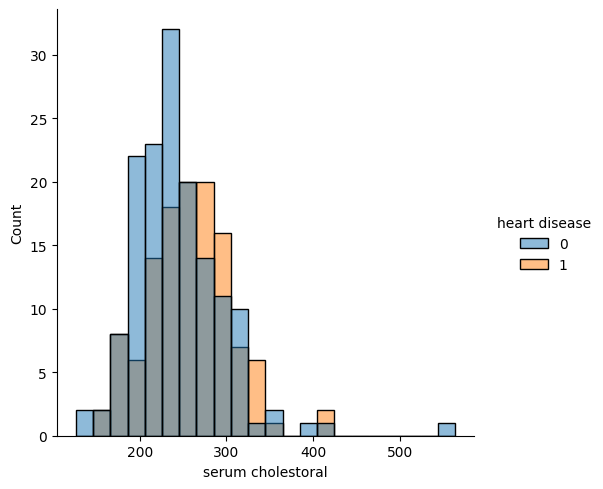

<Figure size 1500x500 with 0 Axes>

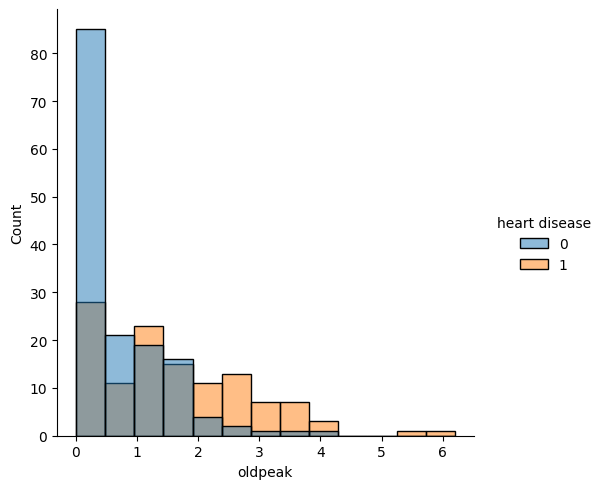

<Figure size 1500x500 with 0 Axes>

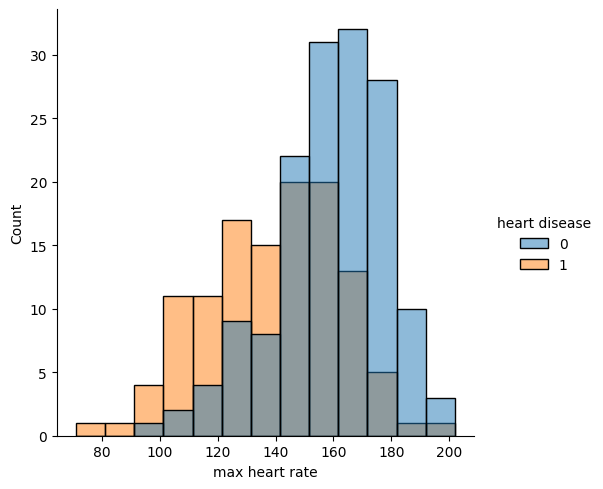

In [47]:
# Dataset visualisation: numerical features distribution
for feature in num_features:
  plt.figure(figsize=(15,5))
  sns.displot(x=feature, hue='heart disease', data=ds)

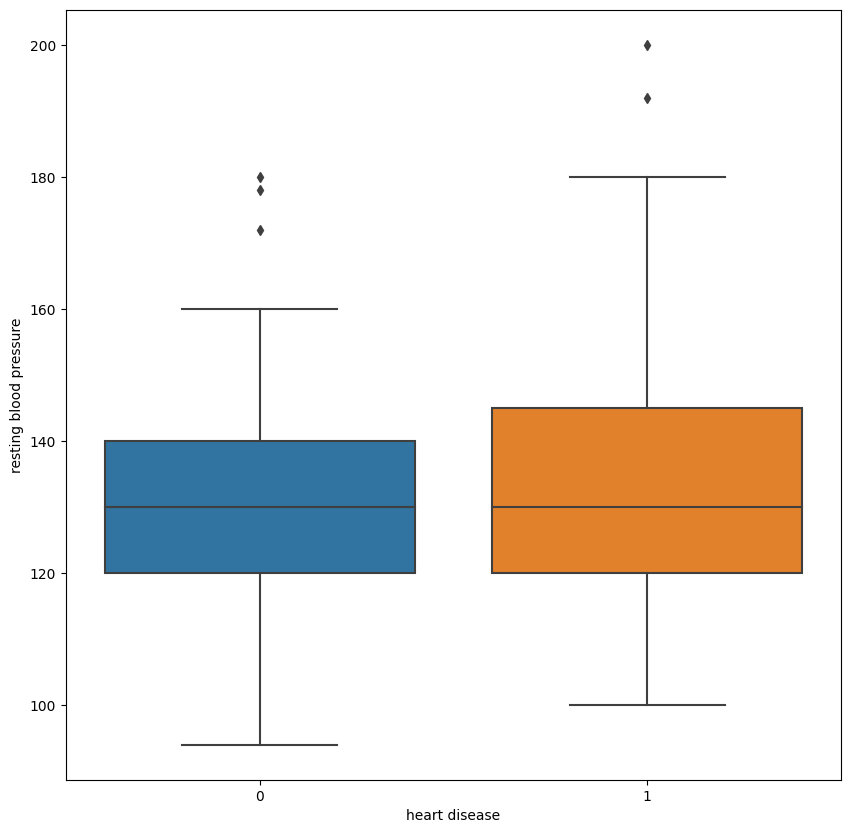

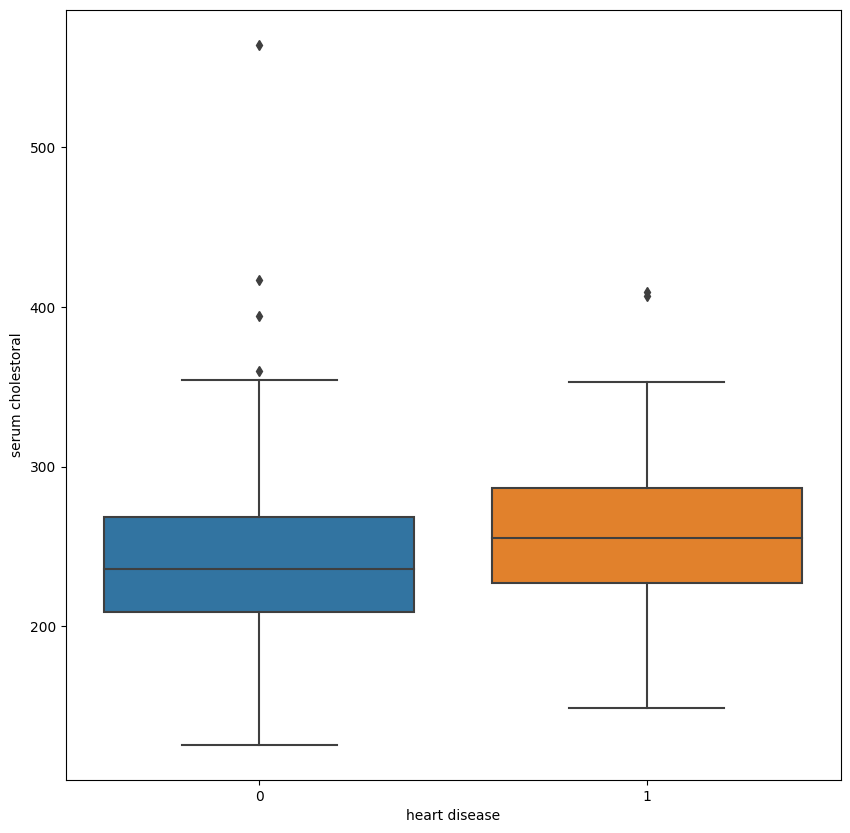

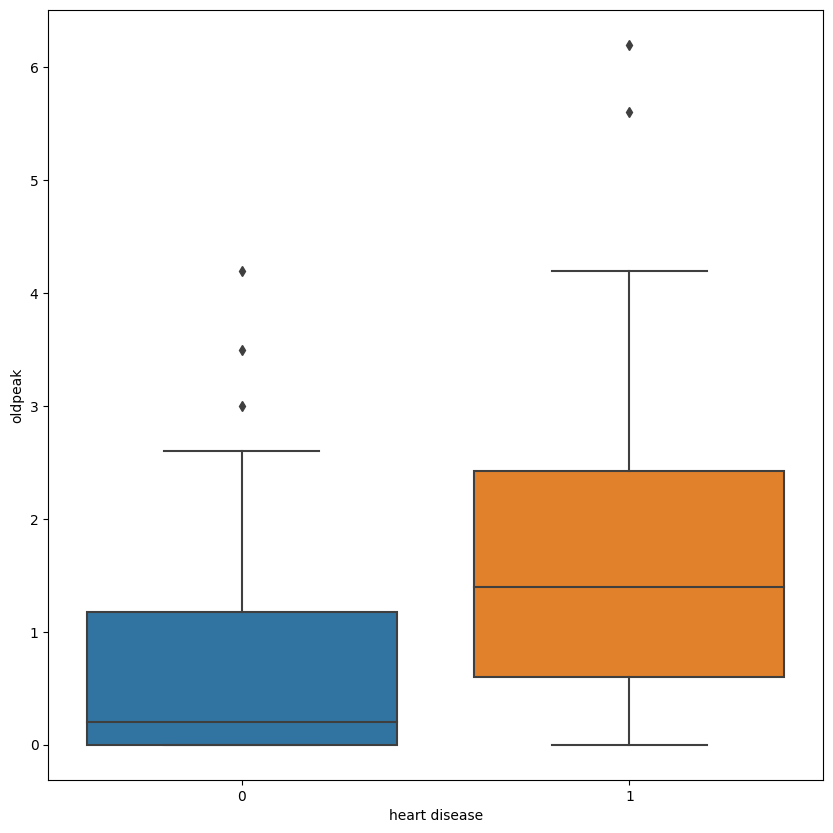

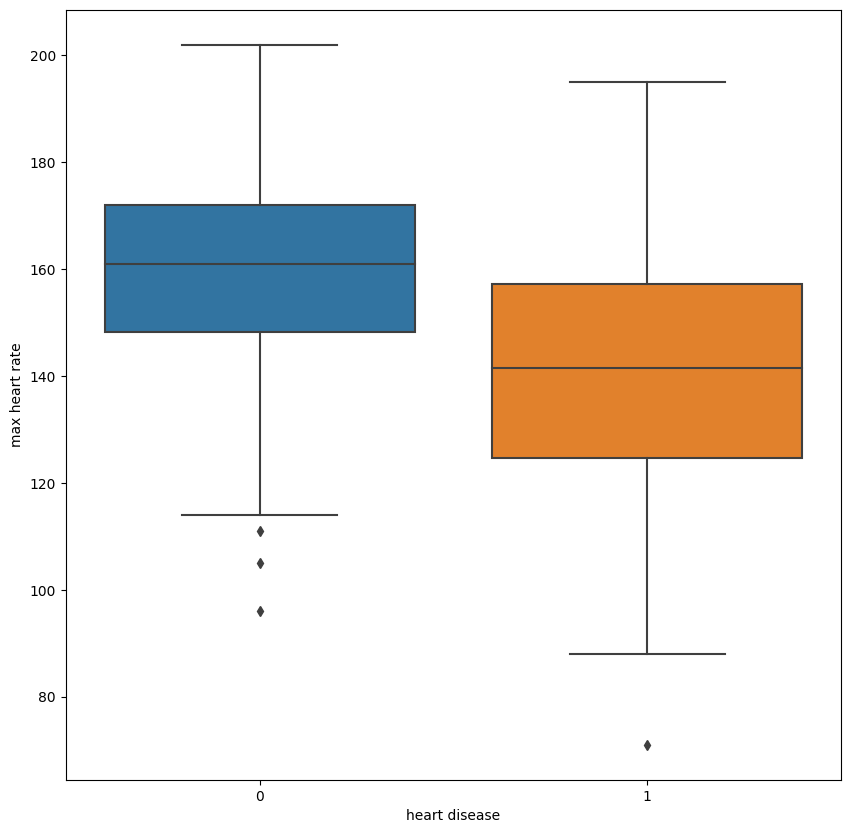

In [48]:
# Boxplots for numerical features
for feature in num_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(x='heart disease', y=feature, data=ds)

In [49]:
# Confusion matrix
def conf_matrix(y_checked, model_predictions):
    plt.figure()
    cm = confusion_matrix(y_checked, model_predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

In [50]:
# Model evaluation

models_data=[]

def model_evaluation(model,name,X_checked,y_checked):
  predict=model.predict(X_checked)
  accuracy = model.score(X_checked, y_checked)
  print('Confusion Matrix:',conf_matrix(y_checked, predict))
  print('Classification Report: \n',classification_report(y_checked, predict))
  f1 = f1_score(y_checked, predict)
  models_data.append((name, accuracy, roc_auc_score(y_checked, predict), f1))
  df = pd.DataFrame(models_data, columns=['Model', 'Accuracy', 'AUC-ROC', 'F1 Score'])
  return df

In [51]:
# Data preparation
X= ds.drop(['heart disease'], axis=1,).copy()
y=ds['heart disease'].copy()

cat_features=['age','sex ','chest pain type','fasting blood sugar','resting electrocardiographic results','exercise induced angina', 'ST segment','major vessels','thal']
num_features=['resting blood pressure','serum cholestoral','oldpeak','max heart rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [52]:
# numerical features preparation
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

# categorial features preparation
cat_preparation = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

# transformer
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

In [53]:
#Logistic Regression
model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=1000))])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__C': np.logspace(-4, 4, 50),
}

model_1 = GridSearchCV(model_pipeline_v1, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_1.fit(X_train, y_train)
print('Parameters: ', model_1.best_params_)
model_1 = model_1.best_estimator_

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Parameters:  {'model__C': 0.040949150623804234, 'preprocessor__numeric_preprocessing__pca__n_components': 0.9}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


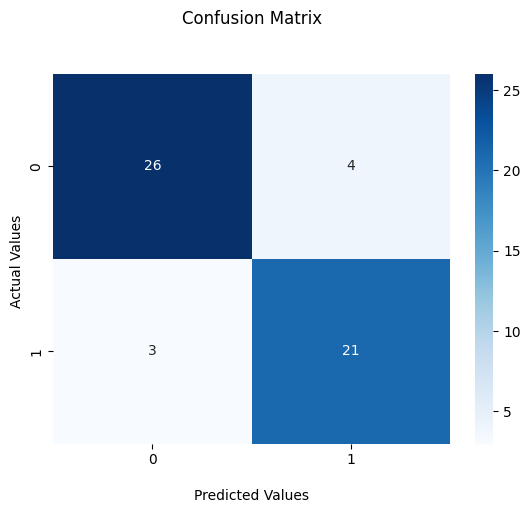

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.84      0.88      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.87037,0.870833,0.857143


In [54]:
model_evaluation(model_1,'LogisticRegression',X_test,y_test)

Fitting 10 folds for each of 495 candidates, totalling 4950 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parameters:  {'model__n_neighbors': 35, 'preprocessor__numeric_preprocessing__pca__n_components': 0.9}


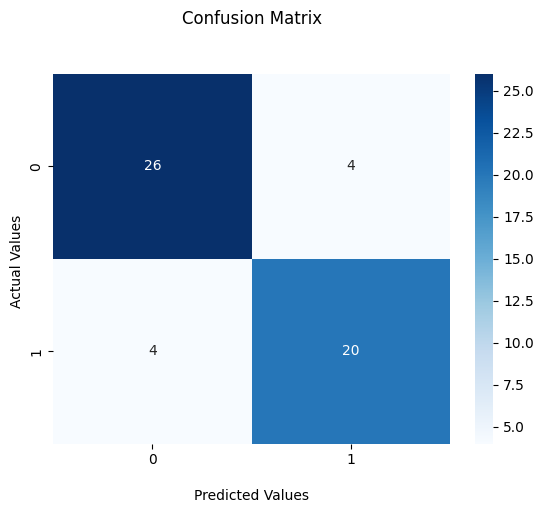

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333


In [55]:
# K Neighbors Classifier

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', KNeighborsClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__n_neighbors': [i for i in range (1,100)]
}

model_2 = GridSearchCV(model_pipeline_v2, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_2.fit(X_train, y_train)
print('Parameters: ', model_2.best_params_)
model_2 = model_2.best_estimator_

model_evaluation(model_2,'KNeighbors',X_test,y_test)

Fitting 10 folds for each of 4500 candidates, totalling 45000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parameters:  {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 3, 'preprocessor__numeric_preprocessing__pca__n_components': 0.99}


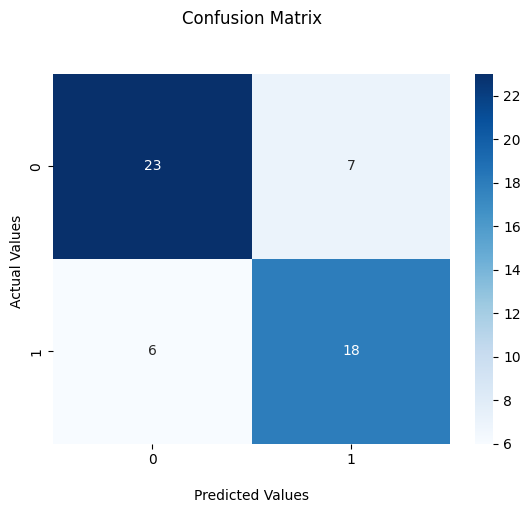

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.72      0.75      0.73        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333
2,DecisionTree,0.759259,0.758333,0.734694


In [56]:
# DecisionTree

model_pipeline_v3 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', DecisionTreeClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__max_depth': [i for i in range (1,11)],
    'model__min_samples_split': [i for i in range (2,11)],
    'model__min_samples_leaf': [i for i in range (1,11)]
}

model_3 = GridSearchCV(model_pipeline_v3, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_3.fit(X_train, y_train)
print('Parameters: ', model_3.best_params_)
model_3 = model_3.best_estimator_

model_evaluation(model_3,'DecisionTree',X_test,y_test)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parameters:  {'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'rbf', 'preprocessor__numeric_preprocessing__pca__n_components': 0.9}


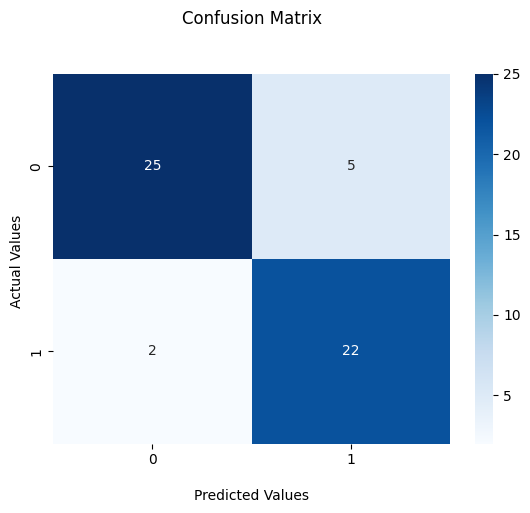

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.81      0.92      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333
2,DecisionTree,0.759259,0.758333,0.734694
3,SVC,0.870370,0.875000,0.862745


In [57]:
# SVC

model_pipeline_v4 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', SVC(probability=True))])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__C': [0.1, 1, 10],
    'model__gamma': [0.1, 0.01, 0.001]
}

model_4 = GridSearchCV(model_pipeline_v4, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_4.fit(X_train, y_train)
print('Parameters: ', model_4.best_params_)
model_4 = model_4.best_estimator_

model_evaluation(model_4,'SVC',X_test,y_test)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parameters:  {'model__base_estimator__max_depth': 7, 'model__learning_rate': 1.0, 'model__n_estimators': 100, 'preprocessor__numeric_preprocessing__pca__n_components': 0.9}


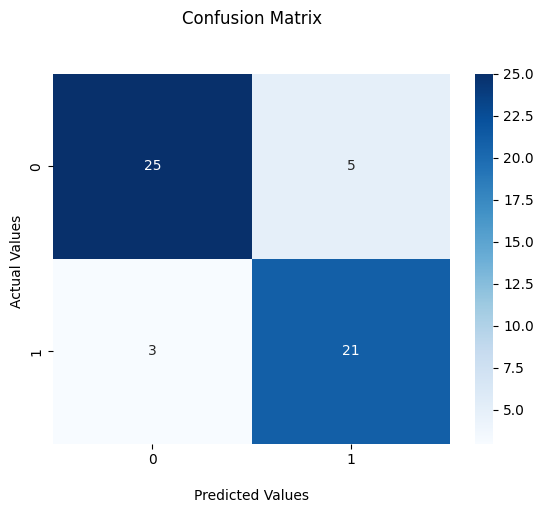

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333
2,DecisionTree,0.759259,0.758333,0.734694
3,SVC,0.870370,0.875000,0.862745
4,AdaBoost,0.851852,0.854167,0.840000


In [58]:
#AdaBoost

model_pipeline_v5 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__n_estimators': [100, 500, 1000],
    'model__learning_rate': [0.1, 0.5, 1.0],
    'model__base_estimator__max_depth': [i for i in range (1,11)]
}

model_5 = GridSearchCV(model_pipeline_v5, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_5.fit(X_train, y_train)
print('Parameters: ', model_5.best_params_)
model_5 = model_5.best_estimator_

model_evaluation(model_5,'AdaBoost',X_test,y_test)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parameters:  {'model__max_depth': 3, 'model__n_estimators': 82, 'preprocessor__numeric_preprocessing__pca__n_components': 0.85}


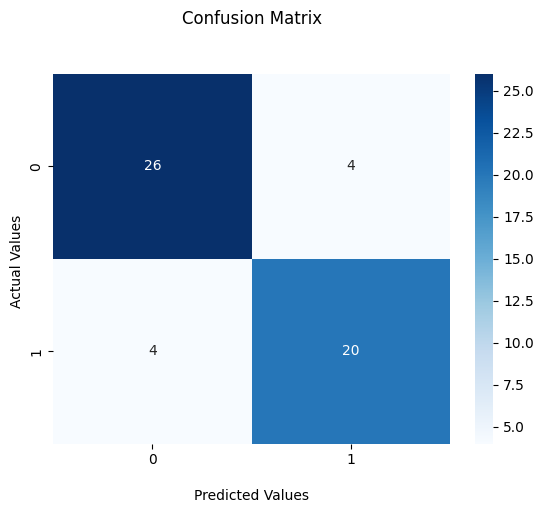

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333
2,DecisionTree,0.759259,0.758333,0.734694
3,SVC,0.870370,0.875000,0.862745
4,AdaBoost,0.851852,0.854167,0.840000
5,RandomForest,0.851852,0.850000,0.833333


In [59]:
# Random Forest
model_pipeline_v6 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model',  RandomForestClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__n_estimators': [i for i in range (1,101)],
    'model__max_depth': [i for i in range (1,11)]
}

model_6 = GridSearchCV(model_pipeline_v6, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
model_6.fit(X_train, y_train)
print('Parameters: ', model_6.best_params_)
model_6 = model_6.best_estimator_

model_evaluation(model_6,'RandomForest',X_test,y_test)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parameters:  {'model__learning_rate': 0.1, 'model__max_depth': 1, 'model__n_estimators': 100, 'preprocessor__numeric_preprocessing__pca__n_components': 0.85}


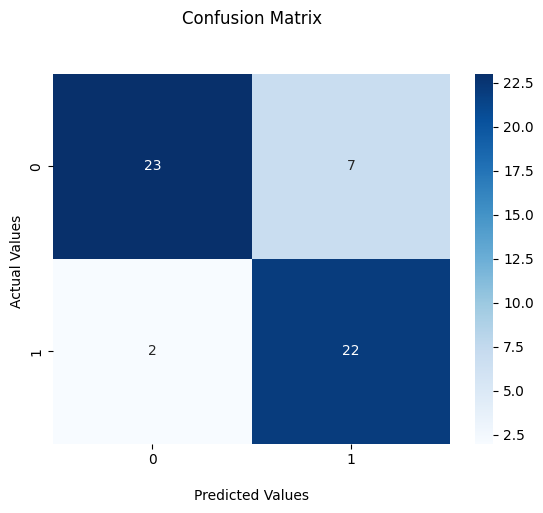

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.76      0.92      0.83        24

    accuracy                           0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333
2,DecisionTree,0.759259,0.758333,0.734694
3,SVC,0.870370,0.875000,0.862745
4,AdaBoost,0.851852,0.854167,0.840000
5,RandomForest,0.851852,0.850000,0.833333
6,XGBoost,0.833333,0.841667,0.830189


In [60]:
model_pipeline_v7 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', XGBClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [i for i in range (1,11)],
    'model__n_estimators': [100, 500, 1000]
}

model_7 = GridSearchCV(model_pipeline_v7, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_7.fit(X_train, y_train)
print('Parameters: ', model_7.best_params_)
model_7 = model_7.best_estimator_

model_evaluation(model_7,'XGBoost',X_test,y_test)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parameters:  {'model__learning_rate': 0.1, 'model__max_depth': 1, 'model__n_estimators': 100, 'preprocessor__numeric_preprocessing__pca__n_components': 0.9}


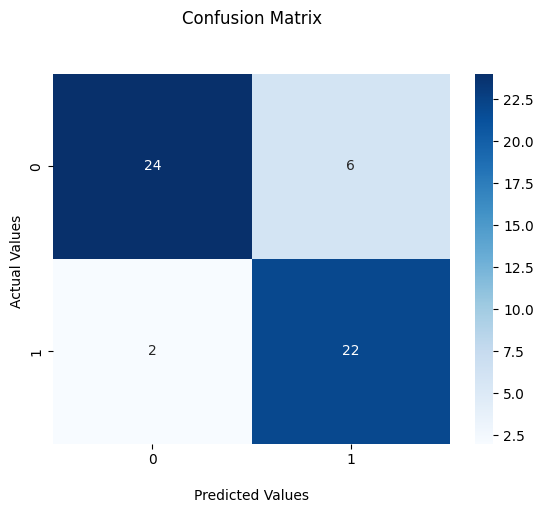

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333
2,DecisionTree,0.759259,0.758333,0.734694
3,SVC,0.870370,0.875000,0.862745
4,AdaBoost,0.851852,0.854167,0.840000
5,RandomForest,0.851852,0.850000,0.833333
6,XGBoost,0.833333,0.841667,0.830189
7,LGBM,0.851852,0.858333,0.846154


In [61]:
model_pipeline_v8 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LGBMClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [i for i in range (1,11)],
    'model__n_estimators': [100, 500, 1000]
}

model_8 = GridSearchCV(model_pipeline_v8, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_8.fit(X_train, y_train)
print('Parameters: ', model_8.best_params_)
model_8 = model_8.best_estimator_

model_evaluation(model_8,'LGBM',X_test,y_test)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0:	learn: 0.6535792	total: 38.3ms	remaining: 1.87s
1:	learn: 0.6170798	total: 41.9ms	remaining: 1s
2:	learn: 0.5889036	total: 59ms	remaining: 925ms
3:	learn: 0.5565481	total: 72.8ms	remaining: 837ms
4:	learn: 0.5278028	total: 86.6ms	remaining: 779ms
5:	learn: 0.5029094	total: 101ms	remaining: 741ms
6:	learn: 0.4813485	total: 117ms	remaining: 721ms
7:	learn: 0.4616465	total: 131ms	remaining: 688ms
8:	learn: 0.4422003	total: 145ms	remaining: 662ms
9:	learn: 0.4216981	total: 160ms	remaining: 640ms
10:	learn: 0.4059221	total: 177ms	remaining: 626ms
11:	learn: 0.3880123	total: 194ms	remaining: 614ms
12:	learn: 0.3727025	total: 207ms	remaining: 589ms
13:	learn: 0.3592055	total: 221ms	remaining: 568ms
14:	learn: 0.3454918	total: 235ms	remaining: 549ms
15:	learn: 0.3320666	total: 251ms	remaining: 534ms
16:	learn: 0.3188918	total: 258ms	remaining: 501ms
17:	learn: 0.3083905	total: 272ms	remaining: 483ms
18:	learn: 0.2960356	total: 274ms	remaining: 447ms
19:	learn: 0.2856993	total: 287ms	remaini

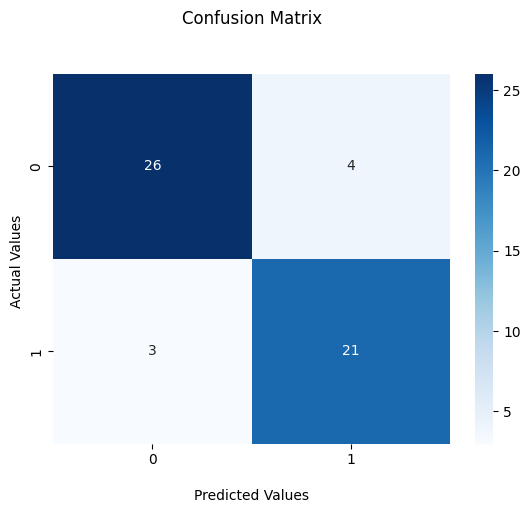

Confusion Matrix: None
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.84      0.88      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.870370,0.870833,0.857143
1,KNeighbors,0.851852,0.850000,0.833333
2,DecisionTree,0.759259,0.758333,0.734694
3,SVC,0.870370,0.875000,0.862745
4,AdaBoost,0.851852,0.854167,0.840000
5,RandomForest,0.851852,0.850000,0.833333
6,XGBoost,0.833333,0.841667,0.830189
7,LGBM,0.851852,0.858333,0.846154
8,CatBoost,0.870370,0.870833,0.857143


In [62]:
model_pipeline_v9 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', CatBoostClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__learning_rate':[0.05, 0.1, 0.15],
    'model__max_depth': [i for i in range (1,11)],
    'model__n_estimators': [50, 100, 150, 200]
}

model_9 = GridSearchCV(model_pipeline_v9, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
model_9.fit(X_train, y_train)
print('Parameters: ', model_9.best_params_)
model_9 = model_9.best_estimator_

model_evaluation(model_9,'CatBoost',X_test,y_test)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


7/7 [==============================] - 1s 30ms/step - loss: 0.6292 - accuracy: 0.6481 - val_loss: 0.5934 - val_accuracy: 0.7778
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5467 - accuracy: 0.7778 - val_loss: 0.5453 - val_accuracy: 0.8148
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.8194 - val_loss: 0.5064 - val_accuracy: 0.8148
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4657 - accuracy: 0.8148 - val_loss: 0.4761 - val_accuracy: 0.8333
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4341 - accuracy: 0.8565 - val_loss: 0.4517 - val_accuracy: 0.8519
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4010 - accuracy: 0.8657 - val_loss: 0.4331 - val_accuracy: 0.8519
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3836 - accuracy: 0.8657 - val_loss: 0.4188 - val_accuracy: 0.8519
Epoch 8/200
7/7 [===================

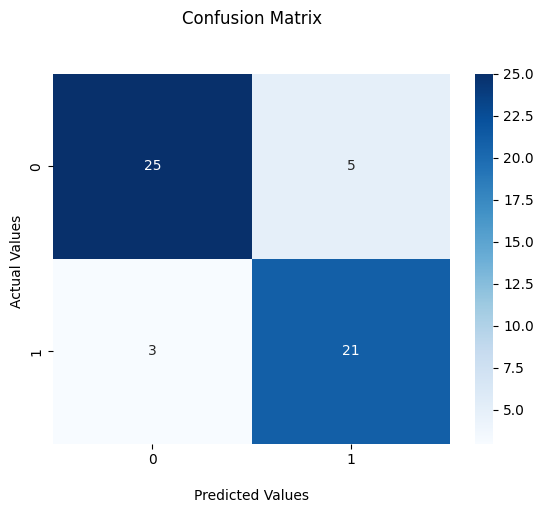

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54

AUC-ROC: 0.8541666666666666


In [63]:
# Neural Network

# Data preparation

X= ds.drop(['heart disease'], axis=1,).copy()
y=ds['heart disease'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_train_trans=data_preparation.fit_transform(X_train)
X_test_trans=data_preparation.transform(X_test)

# Model

model = tf.keras.Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(patience=5, monitor='loss', restore_best_weights=True)
model.fit(X_train_trans, y_train, epochs=200, batch_size=32,callbacks=[es])

# Evaluation

y_test = y_test.values

predictions = model.predict(X_test_trans)
predictions = np.round(predictions)

print("Confusion Matrix:")
conf_matrix(y_test, predictions)

cr = classification_report(y_test, predictions)
print("Classification Report:")
print(cr)

auc_roc = roc_auc_score(y_test, predictions)

print("AUC-ROC:", auc_roc)